# Campus Recruitment Dataset EDA

In [1]:
import numpy as np
import pandas as pd


In [93]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [94]:
df.describe()

sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000

In [95]:
def check_missing(dataframe):
    for col in dataframe.columns:
        print('Number of missing values in column', col, ':', dataframe[col].isnull().sum())


In [96]:
check_missing(df)

Number of missing values in column sl_no : 0
Number of missing values in column gender : 0
Number of missing values in column ssc_p : 0
Number of missing values in column ssc_b : 0
Number of missing values in column hsc_p : 0
Number of missing values in column hsc_b : 0
Number of missing values in column hsc_s : 0
Number of missing values in column degree_p : 0
Number of missing values in column degree_t : 0
Number of missing values in column workex : 0
Number of missing values in column etest_p : 0
Number of missing values in column specialisation : 0
Number of missing values in column mba_p : 0
Number of missing values in column status : 0
Number of missing values in column salary : 67


Text(0.5, 1.0, 'Distribution of Gender Column')

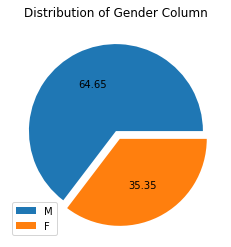

In [97]:
import matplotlib.pyplot as plt

plt.pie(df['gender'].value_counts(), explode=[0, 0.1], autopct='%.2f')
plt.legend(['M', 'F'])
plt.title("Distribution of Gender Column")

In [98]:
df['ssc_b'].unique()
ssc_b_dict = {'Others': 1, 'Central':2}
print(ssc_b_dict)
for i in df['ssc_b']:
    x = ssc_b_dict.get(i)

{'Others': 1, 'Central': 2}


In [99]:
def coding_attr(col, dict):
    coded_var = []
    for item in col:
        item = dict.get(item)
        coded_var.append(item)

    return pd.DataFrame(coded_var)



In [100]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

df_clean = df[['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status']]
df_clean

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0        M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1        M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2        M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3        M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4        M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   
..     ...    ...      ...    ...      ...       ...       ...        ...   
210      M  80.60   Others  82.00   Others  Commerce     77.60  Comm&Mgmt   
211      M  58.00   Others  60.00   Others   Science     72.00   Sci&Tech   
212      M  67.00   Others  67.00   Others  Commerce     73.00  Comm&Mgmt   
213      F  74.00   Others  66.00   Others  Commerce     58.00  Comm&Mgmt   
214      M  62.00  Central  58.00   Others   Science     53.00  Comm&Mgmt   

    workex  etest_p specialisation  mba_p      status  
0       No     55.0         Mkt&HR  58.80      Placed  
1      Yes     86.5        Mkt&Fin  66.28      Placed  
2       No     75.0        Mkt&Fin  57.80      Placed  
3       No     66.0         Mkt&HR  59.43  Not Placed  
4       No     96.8        Mkt&Fin  55.50      Placed  
..     ...      ...            ...    ...         ...  
210     No     91.0        Mkt&Fin  74.49      Placed  
211     No     74.0        Mkt&Fin  53.62      Placed  
212    Yes     59.0        Mkt&Fin  69.72      Placed  
213     No     70.0         Mkt&HR  60.23      Placed  
214     No     89.0         Mkt&HR  60.22  Not Placed  

[215 rows x 13 columns]

In [69]:
df_clean


['Mkt&HR' 'Mkt&Fin']


In [101]:
# Generate dictionary for each column
gender_dict = {
    'M':0,
    'F':1
}

hsc_b_dict = {
    'Others': 0,
    'Central': 1
}

hsc_s_dict = {
    'Commerce': 0,
    'Science': 1,
    'Arts': 2
}

degree_t_dict = {
    'Sci&Tech': 0,
    'Comm&Mgmt': 1,
    'Others': 2
}

workex_dict = {
    'Yes': 1,
    'No': 0
}

specialisation_dict = {
    'Mkt&Fin':0,
    'Mkt&HR':1
}

status_dict = {
    'Placed':1,
    'Not Placed':0
}

col_and_dict = [
    ('gender', gender_dict), 
    ('hsc_b', hsc_b_dict), 
    ('hsc_s', hsc_s_dict),
    ('degree_t', degree_t_dict),
    ('workex', workex_dict),
    ('specialisation', specialisation_dict),
    ('status', status_dict)
    ]


for col_name, col_dict in col_and_dict:
    df_clean.replace(col_dict, inplace=True)


In [103]:
df_clean.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')

In [164]:
target = df_clean['status']
regresors = df_clean[['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']]

logit_model = LogisticRegression(solver='liblinear')

logit_model.fit(regresors, target)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
print(logit_model.coef_)

print(logit_model.intercept_)


[[-0.25058623  0.188339   -0.28777683  0.07914029 -0.27180216  0.31110197
   0.06298764  0.58487509  1.60669289 -0.03394338 -0.7735983  -0.27619684]]
[-1.21800064]


In [166]:
logit_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
logit_model.score(regresors, target)

0.8790697674418605

Text(0.5, 1.0, 'Sigmoid Function')

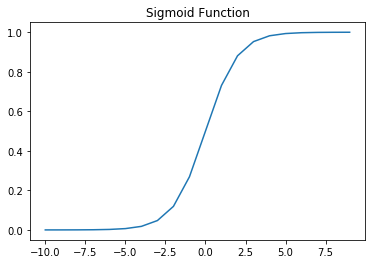

In [204]:
beta = logit_model.coef_
beta0 = logit_model.intercept_

from math import exp
import math

X = range(-10, 10)
def sigmoid(x):
    return exp(x)/(1+ exp(x))

Y = [sigmoid(x) for x in X]

plt.plot(X, Y)
plt.title('Sigmoid Function')

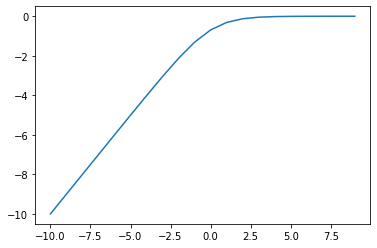

In [205]:
lnY = [math.log(y) for y in Y]

plt.plot(X, lnY)

range(-10, 10)

In [209]:
print(logit_model.predict_proba(regresors[0:1]))
print(logit_model.classes_)


[[0.03308906 0.96691094]]
[0 1]


In [171]:
regresors[0:1]

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0       0   67.0      0   91.0      0      0      58.0         0       0   

   etest_p  specialisation  mba_p  
0     55.0               1   58.8

In [172]:
log_prob = beta0 + np.dot(regresors[0:1], beta.reshape(12,1))

In [206]:
prob = sigmoid(log_prob)
prob

0.966910939797642

In [175]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(target, logit_model.predict(regresors))

In [176]:
acc

0.8790697674418605

By considering that odds ratio are calculated by (increase by 1 unit change)

$ log R = ln\frac{p_1}{1-p_1} - ln\frac{p_2}{1-p_2} =e^{\beta_i}$

In [207]:
log_odds = np.exp(beta)
log_odds

array([[0.77834436, 1.2072427 , 0.74992894, 1.08235616, 0.762005  ,
        1.3649284 , 1.06501367, 1.79476678, 4.98629369, 0.96662624,
        0.46135   , 0.75866358]])

In [208]:
colname = ['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']


pd.DataFrame(log_odds, columns=colname, index=None)

gender     ssc_p     ssc_b     hsc_p     hsc_b     hsc_s  degree_p  \
0  0.778344  1.207243  0.749929  1.082356  0.762005  1.364928  1.065014   

   degree_t    workex   etest_p  specialisation     mba_p  
0  1.794767  4.986294  0.966626         0.46135  0.758664

From the above Log-odds, comparing a female (gender =1) with a male(gender = 0), the odds for a male to be placed would

In [191]:
from sklearn.metrics import confusion_matrix



In [192]:
conf_matrix = confusion_matrix(target, logit_model.predict(regresors))

In [195]:
target_pred = logit_model.predict(regresors)

conf_matrix

array([[ 52,  15],
       [ 11, 137]], dtype=int64)

In [203]:
from sklearn.metrics import classification_report
print(classification_report(target, target_pred))

precision    recall  f1-score   support

           0       0.83      0.78      0.80        67
           1       0.90      0.93      0.91       148

    accuracy                           0.88       215
   macro avg       0.86      0.85      0.86       215
weighted avg       0.88      0.88      0.88       215



In [197]:
from sklearn.metrics import roc_auc_score, roc_curve

logit_roc = roc_auc_score(target, target_pred)

In [198]:
logit_roc

0.8508975393303752

In [233]:
predicted_prob = logit_model.predict_proba(regresors)
placed_probability = []
for i in range(0, len(predicted_prob)):
    placed_probability.append(logit_model.predict_proba(regresors)[i][1])




In [236]:
df['Probability_placed'] = placed_probability

In [237]:
df

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  \
0     Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0   
1     Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0   
2    Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0   
3     Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN   
4    Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0   
..         ...    ...      ...            ...    ...         ...       ...   
210  Comm&Mgmt     No     91.0        Mkt&Fin  74.49      Placed  400000.0   
211   Sci&Tech     No     74.0        Mkt&Fin  53.62      Placed  275000.0   
212  Comm&Mgmt    Yes     59.0        Mkt&Fin  69.72      Placed  295000.0   
213  Comm&Mgmt     No     70.0         Mkt&HR  60.23      Placed  204000.0   
214  Comm&Mgmt     No     89.0         Mkt&HR  60.22  Not Placed       NaN   

     Probability_placed  
0              0.966911  
1              0.994458  
2              0.929193  
3              0.049403  
4              0.998881  
..                  ...  
210            0.905646  
211            0.878554  
212            0.903233  
213            0.895196  
214            0.192875  

[215 rows x 16 columns]

In [239]:
df.to_csv('placement_data_with_probability.csv')
